# Batch methods

In [1]:
# standard imports
import matplotlib.pyplot as plt
import pandas as pd
import os
import tempfile
%matplotlib inline
# import seaborn as sbn # can be used for getting nice colormaps and good settings of the matplotlib rc

In [2]:
# some tweaks to change the apperance of the notebook (you dont have to use these if you dont like them)

# big figures
from IPython.core.pylabtools import figsize
figsize(14, 7)

# full width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [4]:
# cellpy imports
from cellpy.utils import batch

In [5]:

def clean_dir():
    new_path = tempfile.mkdtemp()
    return new_path

In [6]:
def batch_instance(clean_dir):
    prms = batch.prms
    prms.Paths["db_filename"] = test_db_filename
    prms.Paths["cellpydatadir"] = test_data_dir_cellpy
    prms.Paths["outdatadir"] = clean_dir
    prms.Paths["rawdatadir"] = test_data_dir_raw
    prms.Paths["db_path"] = test_data_dir_db
    prms.Paths["filelogdir"] = clean_dir
    return batch.init(log_level="DEBUG")

In [7]:
# -------- defining overall path-names etc ----------
current_file_path = os.getcwd()
relative_test_data_dir = "../testdata"
test_data_dir = os.path.abspath(os.path.join(current_file_path, relative_test_data_dir))

test_data_dir_raw = os.path.join(test_data_dir, "data")
test_data_dir_out = os.path.join(test_data_dir, "out")
test_data_dir_cellpy = os.path.join(test_data_dir, "hdf5")
test_data_dir_db = os.path.join(test_data_dir, "db")

test_cellpy_file = "20160805_test001_45_cc.h5"
test_cellpy_file_full = os.path.join(test_data_dir_cellpy,test_cellpy_file)

test_cellpy_file_tmp = "tmpfile.h5"
test_cellpy_file_tmp_full = os.path.join(test_data_dir_cellpy,test_cellpy_file_tmp)

test_db_filename = "cellpy_db.xlsx"
test_db_filename_full = os.path.join(test_data_dir_db,test_db_filename)

test_run_name = "20160805_test001_45_cc"

test_res_file = "20160805_test001_45_cc_01.res"
test_res_file_full = os.path.join(test_data_dir_raw,test_res_file)

In [8]:
out_dir = clean_dir()
print(out_dir)

/var/folders/wj/k1t54hxd4jqfym7f1sy0rg980000gn/T/tmpgigm8rbe


In [9]:
b = batch_instance(out_dir)

(cellpy) - /Users/jepe/scripting/cellpy/cellpy/utils/batch.py:423: UserWarning: Trying to set non-existing attribute (log_level)
  warnings.warn("Trying to set non-existing attribute (%s)" % key)



In [10]:
# Name of the experimental set (as defined in the excel-file)
name = "test"
project = "ProjectOfRun"
b.name = name
b.project = project

In [11]:
# some options for loading, exporting and saving
b.export_raw = True
b.export_cycles = True
b.export_ica = False
b.save_cellpy_file = True
b.force_raw_file = True
b.force_cellpy_file = False
b.shifted_cycles = True

# adding some extra things to make a summary of:
b.selected_summaries.extend(["shifted_charge_capacity", "shifted_discharge_capacity", "low_level", "high_level",])

In [12]:
b.create_info_df()

In [13]:
b.create_folder_structure()

In [14]:
b.load_and_save_raw()

[|.]
(cellpy) - Processing 20160805_test001_45_cc
(cellpy) - created CellpyData instance
(cellpy) - setting cycle mode (anode)...
(cellpy) - loading cell
(cellpy) - not forcing
(cellpy) - started loadcell
(cellpy) - cellpy file(s) needs updating - loading raw
(cellpy) - assuming cycling anode half-cell (discharge before charge)
(cellpy) - ...loaded successfully...
(cellpy) - Trying to get summary_data
(cellpy) - exporting csv
(cellpy) - saving to csv (CellpyData.to_csv
(cellpy) - /var/folders/wj/k1t54hxd4jqfym7f1sy0rg980000gn/T/tmpgigm8rbe/ProjectOfRun/test/raw_data/20160805_test001_45_cc_01_normal.csv OK
(cellpy) - /var/folders/wj/k1t54hxd4jqfym7f1sy0rg980000gn/T/tmpgigm8rbe/ProjectOfRun/test/raw_data/20160805_test001_45_cc_01_steps.csv OK
(cellpy) - /var/folders/wj/k1t54hxd4jqfym7f1sy0rg980000gn/T/tmpgigm8rbe/ProjectOfRun/test/raw_data/20160805_test001_45_cc_01_stats.csv OK
(cellpy) - /var/folders/wj/k1t54hxd4jqfym7f1sy0rg980000gn/T/tmpgigm8rbe/ProjectOfRun/test/raw_data/20160805_tes

In [15]:
b.make_summaries()

(cellpy) - saved summary (discharge_capacity) to:
       /var/folders/wj/k1t54hxd4jqfym7f1sy0rg980000gn/T/tmpgigm8rbe/ProjectOfRun/test/summary_discharge_capacity_test.csv
(cellpy) - saved summary (charge_capacity) to:
       /var/folders/wj/k1t54hxd4jqfym7f1sy0rg980000gn/T/tmpgigm8rbe/ProjectOfRun/test/summary_charge_capacity_test.csv
(cellpy) - saved summary (coulombic_efficiency) to:
       /var/folders/wj/k1t54hxd4jqfym7f1sy0rg980000gn/T/tmpgigm8rbe/ProjectOfRun/test/summary_coulombic_efficiency_test.csv
(cellpy) - saved summary (cumulated_coulombic_efficiency) to:
       /var/folders/wj/k1t54hxd4jqfym7f1sy0rg980000gn/T/tmpgigm8rbe/ProjectOfRun/test/summary_cumulated_coulombic_efficiency_test.csv
(cellpy) - saved summary (ir_discharge) to:
       /var/folders/wj/k1t54hxd4jqfym7f1sy0rg980000gn/T/tmpgigm8rbe/ProjectOfRun/test/summary_ir_discharge_test.csv
(cellpy) - saved summary (ir_charge) to:
       /var/folders/wj/k1t54hxd4jqfym7f1sy0rg980000gn/T/tmpgigm8rbe/ProjectOfRun/test/sum

In [16]:
p = os.path.join(out_dir, b.project)
print(p)
p = os.path.join(p, b.name)
os.listdir(p)
r = os.path.join(p, 'raw_data')
os.listdir(r)

/var/folders/wj/k1t54hxd4jqfym7f1sy0rg980000gn/T/tmpgigm8rbe/ProjectOfRun


['20160805_test001_45_cc_01_steps.csv',
 '20160805_test001_45_cc_01_normal.csv',
 '20160805_test001_47_cc_01_stats.csv',
 '20160805_test001_47_cc_01_cycles.csv',
 '20160805_test001_47_cc_01_normal.csv',
 '20160805_test001_45_cc_01_stats.csv',
 '20160805_test001_47_cc_01_steps.csv',
 '20160805_test001_45_cc_01_cycles.csv']

In [17]:
f = os.path.join(r, '20160805_test001_47_cc_01_cycles.csv')
cycles = pd.read_csv(f, sep=';')

In [18]:
cycles.head()

,cap cycle_no 1,voltage cycle_no 1,cap cycle_no 2,voltage cycle_no 2,cap cycle_no 3,voltage cycle_no 3,cap cycle_no 4,voltage cycle_no 4,cap cycle_no 5,voltage cycle_no 5,...,cap cycle_no 14,voltage cycle_no 14,cap cycle_no 15,voltage cycle_no 15,cap cycle_no 16,voltage cycle_no 16,cap cycle_no 17,voltage cycle_no 17,cap cycle_no 18,voltage cycle_no 18
0,0.000634,2.839894,261.552288,0.860937,-4.838299,0.844310,-298.862582,0.833225,-417.165479,0.792888,...,-1600.269371,0.773182,-1725.070796,0.770718,-1853.006535,0.766408,-1972.770993,0.761789,-2094.895337,0.757170
1,0.003300,2.799865,261.616523,0.855702,-4.763266,0.839075,-298.826449,0.827990,-417.111436,0.787038,...,-1600.238213,0.767947,-1725.055306,0.765484,-1852.958146,0.760865,-1972.736593,0.756246,-2094.852403,0.751936
2,0.007470,2.763532,261.777258,0.850468,-4.616344,0.833840,-298.731151,0.822756,-416.966242,0.781495,...,-1600.142413,0.762713,-1724.986925,0.760249,-1852.849386,0.755631,-1972.655108,0.751012,-2094.757299,0.746701
3,0.010150,2.729045,261.964893,0.844925,-4.438692,0.828606,-298.582109,0.817521,-416.782988,0.775953,...,-1599.998550,0.757170,-1724.876960,0.754707,-1852.705335,0.750088,-1972.518899,0.745469,-2094.628439,0.741467
4,0.014154,2.696099,262.187778,0.839691,-4.234700,0.823371,-298.425593,0.811979,-416.585924,0.770718,...,-1599.820710,0.751936,-1724.721150,0.749472,-1852.535675,0.744854,-1972.362382,0.740235,-2094.478100,0.736232


In [19]:
cycles.tail()

,cap cycle_no 1,voltage cycle_no 1,cap cycle_no 2,voltage cycle_no 2,cap cycle_no 3,voltage cycle_no 3,cap cycle_no 4,voltage cycle_no 4,cap cycle_no 5,voltage cycle_no 5,...,cap cycle_no 14,voltage cycle_no 14,cap cycle_no 15,voltage cycle_no 15,cap cycle_no 16,voltage cycle_no 16,cap cycle_no 17,voltage cycle_no 17,cap cycle_no 18,voltage cycle_no 18
1100,266.416472,0.982870,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1101,264.888731,0.988413,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1102,263.322386,0.993647,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1103,261.874102,0.998882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1104,261.549568,1.000113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


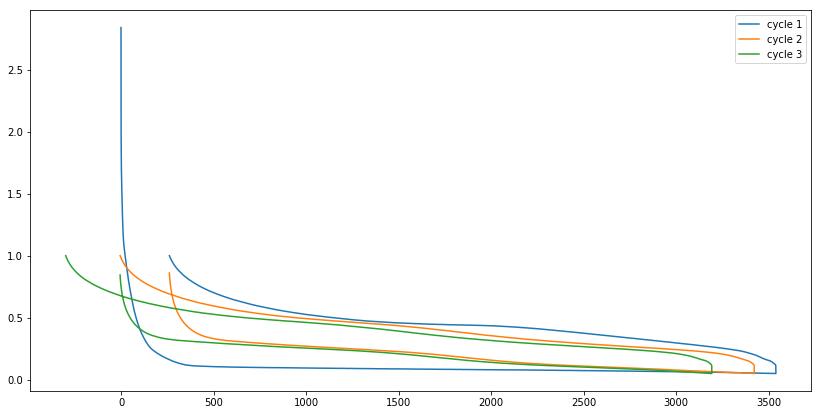

In [20]:
fig, ax = plt.subplots(1,1)
ax.plot(cycles["cap cycle_no 1"], cycles["voltage cycle_no 1"], label="cycle 1")
ax.plot(cycles["cap cycle_no 2"], cycles["voltage cycle_no 2"], label="cycle 2")
ax.plot(cycles["cap cycle_no 3"], cycles["voltage cycle_no 3"], label="cycle 3")
plt.legend()

In [21]:
import shutil

In [22]:
shutil.rmtree(p)